# <center>Assignment 2</center>

<b>Due Date</b>: Thursday, February 7, 11:59pm. To be submitted via brightspace. <br>
<b>Please note</b>: Can be done in pairs. <b>Submit from only one of the team members' accounts, i.e. do not submit from two different accounts</b>; please indicate both names & student numbers clearly on the submission.

This assignment is on Decision Trees and Linear Regression. It is preferred that you code in Python3. All the imports made in this notebook are as below; if these imports work, you are (mostly) set to complete the assignment.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import SVG
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import display
from math import log
import re

Download the following datasets from google drive [The links and names are embedded in the commands]. 

Those who use Linux/Mac/Colab can directly run the below cell by uncommenting the commands. 

In [0]:
!curl -L -o real_news.txt "https://drive.google.com/uc?export=download&id=1pVbIc8ZGqsNVQE7UXa6Pu5VxkW57Uono"
!curl -L -o fake_news.txt "https://drive.google.com/uc?export=download&id=1ejl2esjM8heh90hjdtUh39h3ysLeNa3A"
!curl -L -o houses.csv "https://drive.google.com/uc?export=download&id=1mwmM-EF58LRQjm0Hj5oirRAIXuTvlDzP"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   1216      0 --:--:-- --:--:-- --:--:--  1212
100  100k  100  100k    0     0   224k      0 --:--:-- --:--:-- --:--:--  224k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   1969      0 --:--:-- --:--:-- --:--:--  1959
100 94400  100 94400    0     0   320k      0 --:--:-- --:--:-- --:--:--  320k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   1068      0 --:--:-- --:--:-- --:--:--  1068
100 1158k  100 1158k    0     0  2363k      0 --:--:-- --:--:-- --:--:-- 2363k


<table>
  <tr>
    <td>**Section**</td>
    <td>**Score**</td>
  </tr>
  <tr>
    <td> Decision Trees </td>
    <td> 20 </td>
  </tr>
  <tr>
    <td> Linear Regression </td>
    <td> 40 </td>
  </tr>
    <tr>
    <td> Bonus (this is optional) </td>
    <td> 5 </td>
  </tr>
  <tr>
    <td> **Total**  </td>
    <td> **60 (+5 if you attempt the bonus question)** </td>
  </tr>
  </table>

## 1. Decision Trees [20 pts]

We will train a Decision Tree (sklearn) for building a real vs fake news headlines classifier. The details of the dataset are as follows:
* The fake news headlines are taken from https://www.kaggle.com/mrisdal/fake-news/data.
* The real news headlines are taken from https://www.kaggle.com/therohk/million-headlines.
* For the purposes of the assignment, only headlines containing the word "trump" are used.
* The resulting datasets, real_news.txt and fake_news.txt, contain 1968 real and 1298 fake news headlines. 

Instructions for ```load_dataset``` [2 pts]:
1. Load the real_news and fake_news datasets. 
2. Vectorize the given texts using SkLearn's <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html">TF-IDF Vectorizer</a>. Refer to the example given. <br>
[Come up with a way to store the words and their indices - you will need it for visualize]
3. Now, split the dataset randomly into train [70%], validation[15%] and test [15%].
4. Return these values.

Instructions for ```select_model``` [3 pts]:
1. Train <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">Decision Trees</a> by varying the ```max_depth``` parameter [Use 'entropy' as the criterion.]. <br> <b>Q:</b> Why might we vary the max_depth parameter? [1 pt] <br/>
<b>A: </b> Max depth indicates how deep the tree should be. If we increase the max_depth it captures more information and tend to perform well on training dataset but might fail on valid and test data(overfitting). So we need to select the best max_depth value for which the model genealizes well. 

2. Try out at least 5 different values. <br> <b>Q:</b> How did you choose potential values? [1 pt]
<br/><b>A:</b> To select the best model check if the model performs well on validation data. In addition also check the difference between the train accuracy and validation accuracy is minimum. So as to avoid selecting the overfitted model.
 
3. For each of the classifiers, print out the accuracies on the validation dataset.
4. Return the best performing model.

Instructions for ```visualize``` [5 pts]:
- Visualize the first two levels of the best decision tree, using any means you wish: either hand-drawing a figure, or displaying text, or otherwise, as long as key details are clear, e.g. the word & decision boundary at each node, etc.
- Write the code you used to extract this info inside the function. 

Instructions for ```information_gain```[5 pts]:
- Compute the $I(Y;x_i)$ where $Y$ is the random variable signifying whether the headline is real or fake, and $x_i$ is the word in the headline used to determine the split in the data.  

In [0]:
word_indices = None
def load_dataset():
    train, validation, test = None,None,None
    # Code here.
    #read fake_news and real_news text files
    fn_file = open("fake_news.txt")
    fake_list = fn_file.read().split('\n')
    rn_file = open("real_news.txt")
    real_list = rn_file.read().split('\n')
    fn_file.close()
    rn_file.close()
    fake_list.remove('')
    real_list.remove('')
    #create pandas dataframe and label the list of fake and real and concat them
    fake_df = pd.DataFrame({'news': fake_list,'type':'fake'})
    real_df = pd.DataFrame({'news': real_list, 'type': 'real'})
    news_df = pd.concat([real_df,fake_df])
    #vectorize the text and create a new column containing vector for each headline
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(news_df['news'])
    global word_indices 
    word_indices = vectorizer.get_feature_names()
    news_df['news_vec'] = list(vectors.toarray())
    #split the data into train,valid and test in 70,15 and 15 respectively
    train, test_valid = train_test_split(news_df, test_size= 0.30, shuffle= True, random_state= 42,stratify=news_df['type'])
    validation, test = train_test_split(test_valid, test_size= 0.50,shuffle= True, random_state= 42,stratify=test_valid['type'])
    return train, validation, test

In [0]:
def select_model(train,validation):
    best_classifier = None
    # Code here
    best_score =0.0
    best_depth=0
    depth_list = [22,42,62,82,100]
    for depth in depth_list:
      tree_classifier = DecisionTreeClassifier(criterion ='entropy',max_depth=depth)
      #train model
      tree_classifier = tree_classifier.fit(train['news_vec'].tolist(),train['type'])
      #calculate train and valid score
      train_score = tree_classifier.score(train['news_vec'].tolist(),train['type'])
      valid_score = tree_classifier.score(validation['news_vec'].tolist(),validation['type'])
      print("Train Score for Depth "+str(depth)+": "+str(train_score))
      print("Valid Score for Depth "+str(depth)+": "+str(valid_score))
      #select the best model
      if valid_score > best_score and train_score-valid_score<0.15:
        best_score = valid_score
        best_classifier = tree_classifier
        best_depth=depth
    print("Tree with depth:"+str(best_depth))
    return best_classifier

In [0]:
#Reference:https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
def visualize(decisionTree):
    graph = Source( export_graphviz(decisionTree, out_file=None,max_depth =2, filled=True, 
                                rounded=True,special_characters=True,feature_names=word_indices))
    display(SVG(graph.pipe(format='svg')))

In [0]:
def information_gain(data, word):
    # calculate probablities of fake and real targets
    prob_fake = (data['type'] == 'fake').sum() / data['type'].count()
    prob_real = (data['type'] == 'real').sum() / data['type'].count()
    # calculate the entropy of the fake and real targests
    entropy_Y = - prob_fake * log(prob_fake, 2) - prob_real * log(prob_real, 2)
    # create a list of Boolean for word present or not
    listofword = np.array(data['news'].apply(lambda row: True if re.search(r'\b' + word + r'\b', row) else False)).reshape(-1, 1)
    # fetch type [fake or real]
    listoflabels = np.array(data['type']).reshape(-1, 1)
    #join the above to created numpy arrays
    jointlist = np.append(listofword, listoflabels.reshape(-1, 1), axis=1)
    # calculate the probablities of real or fake given the text contains that word or not
    prob_fake_givenword = (np.logical_and(jointlist[:, 0] ==True, jointlist[:, 1] == 'fake') == True).sum() / (jointlist[:, 0] ==True).sum()
    prob_real_givenword = (np.logical_and(jointlist[:, 0] ==True, jointlist[:, 1] == 'real') == True).sum() / (jointlist[:, 0] ==True).sum()
    prob_fake_notword = (np.logical_and(jointlist[:, 0] == False, jointlist[:, 1] == 'fake') == True).sum() / (jointlist[:, 0] == False).sum()
    prob_real_notword = (np.logical_and(jointlist[:, 0] == False, jointlist[:, 1] == 'real') == True).sum() / (jointlist[:, 0] == False).sum()
    # entropy of word in text
    entropy_givenword = - prob_real_givenword * (log(prob_real_givenword, 2) if prob_real_givenword != 0 else 0) - prob_fake_givenword * (log(prob_fake_givenword, 2) if prob_fake_givenword != 0 else 0)
    # entropy of word not in text
    entropy_notword = - prob_real_notword * (log(prob_real_notword, 2) if prob_real_notword != 0 else 0) - prob_fake_notword * (log(prob_fake_notword, 2) if prob_fake_notword != 0 else 0) 
    # multiply entropy by number of of samples in their split by total number of samples
    info = ((jointlist[:,0]==True).sum()/(jointlist[:,0]).shape[0])*entropy_givenword + ((jointlist[:,0]==False).sum()/(jointlist[:,0]).shape[0])*entropy_notword
    info_gain = entropy_Y - info
    return info_gain

In [0]:
train, validation, test = load_dataset()
#select the best model
best_classifier = select_model(train, validation)
#evaluate accuracy on the test dataset.
test_score = best_classifier.score(test['news_vec'].tolist(),test['type'])
print("Test Score:"+str(test_score))

Train Score for Depth 22: 0.9531933508311461
Valid Score for Depth 22: 0.7979591836734694
Train Score for Depth 42: 0.989501312335958
Valid Score for Depth 42: 0.7795918367346939
Train Score for Depth 62: 1.0
Valid Score for Depth 62: 0.7755102040816326
Train Score for Depth 82: 1.0
Valid Score for Depth 82: 0.7775510204081633
Train Score for Depth 100: 1.0
Valid Score for Depth 100: 0.7775510204081633
Tree with depth:0


AttributeError: ignored

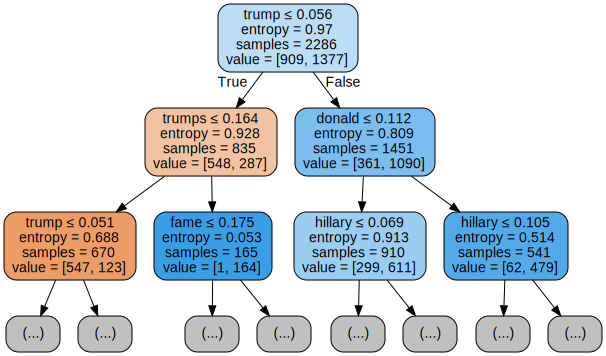

In [0]:
visualize(best_classifier)

Write down the cleaned version of the output of visualize function below:
##

In [0]:
# information_gain of the root word 
print("Info Gain for word \'trump\'  : "+str(information_gain(train,'trump')))
# outputs for 5 different carefully chosen words.
print("Info Gain for word \'donald\' : "+str(information_gain(train,'donald')))
print("Info Gain for word \'trumps\' : "+str(information_gain(train,'trumps')))
print("Info Gain for word \'hillary\': "+str(information_gain(train,'hillary')))
print("Info Gain for word \'clinton\': "+str(information_gain(train,'clinton')))
print("Info Gain for word \'star\'   : "+str(information_gain(train,'star')))

Info Gain for word 'trump'  : 0.039820857181894764
Info Gain for word 'donald' : 0.05062493493216147
Info Gain for word 'trumps' : 0.04720386093386297
Info Gain for word 'hillary': 0.033167923519466846
Info Gain for word 'clinton': 0.010496694891769742
Info Gain for word 'star'   : 0.009086706786931797


## 2. Linear Regression

### 2.1 House Prices Data [5 pts]
We will apply linear regression to predict house sale prices based on the data for houses sold in King County between May 2014 and May 2015. 

This is the description of the dataset we will be using:

In [0]:
houses = pd.read_csv("houses.csv")
houses.describe()

,price (grands),bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated_age,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,540.088142,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,45.994864,2.380882,1986.552492,12768.455652
std,367.127196,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,12.359528,685.391304,27304.179631
min,75.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,2.000000,0.000000,399.000000,651.000000
25%,321.950000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,20.000000,0.000000,1490.000000,5100.000000
50%,450.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,42.000000,0.000000,1840.000000,7620.000000
75%,645.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,66.000000,0.000000,2360.000000,10083.000000
max,7700.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,117.000000,114.000000,6210.000000,871200.000000


### Review Questions [10 pts (+5 bonus)]:

1. <b> Update rule: </b>In addition to the usual loss term based on residuals, the cost function of linear regression can also incorporate a term for something called <i>regularization</i>. (The intuition behind this will be discussed in class later, but for now all you need is the equation). The cost function is then given as the sum of the squares of the residuals, plus an additional regularization term as follows:

    $$\epsilon = \frac{1}{2N} \sum_{i=1}^{N} (y^{(i)} - t^{(i)})^2 + \frac{\lambda}{2} \sum_{j=0}^{D} w_j^2$$
   
   - N - size of training data
   - t - Target output
   - The predicted output $y$ is computed for a given $x$ as $$y = \sum_{j=0}^{D} w_jx_j$$ 
  Assume that $x_0$ is always set to 1,  so that $w_0$ behaves as the bias term (this is just a notational convenience).
   - D - Number of dimensions of each training data
   - $\lambda$ - controls the amount of regularization. Assume it is fixed to have some value between 0 and 1. 
   - $\epsilon$ - The cost function to be minimized
   
   <b>Q:</b> Fill in the Gradient descent update rule for $w_j$ below [2 pts]:
   
     <b>A:</b> $$w_j \leftarrow  w_j - {\alpha}(\frac{1}{N} \sum_{i=1}^{N} x_j^{(i)}(y^{(i)} - t^{(i)}) + {\lambda} w_j)$$
   
   <b>Q:</b> This type of regularization is called "weight decay". Based on the above update rule, can you guess why? [1 pt] <br>
   Hint: Requires rearranging and grouping terms. <br>
   <b>A:</b>  When we simplify the above equation we can see that we are subracting $${\alpha}{\lambda}{w_j}$$ from the standard gradient descent update rule. So, it decays the weight linearly.This penalises the higher weights and prevents overshooting from the minimum cost fuction. 

2. <b>Cost function: </b> Consider a Linear regression model in 2D space with 2 weights and no bias term:
    $$ y = w_1 x_1 + w_2 x_2 $$ <br>
    With MSE (mean-squared error), the total cost for the dataset is $\epsilon = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - t^{(i)})^2 $.
    
    Given a training set consisting of $N=3$ examples:
    - $x^{(1)}=(2,0), t^{(1)} = 1$
    - $x^{(2)}=(0,1), t^{(2)} = 2$
    - $x^{(3)}=(0,1), t^{(3)} = 0$
    
   Write the cost in the form
    $$ \epsilon = c_1 (w_1 - d_1)^2 + c_2 ( w_2 - d_2)^2 + c_3$$
    
   <b>Q: </b> What are the values of $c_1, d_1, c_2, d_2$ and $c_3$? [2 pts] <br>
   <b>A: </b>$$c_1=\frac{4}{3}, d_1=\frac{1}{2}, c_2=\frac{2}{3}, d_2={1},  c_3=\frac{2}{3}$$<br/>
   
   <b>Q: </b> Plot the above function for $\epsilon = 1$; you may hand-draw it or use desmos graphing calculator. What shape does the cost function represent? [5 pts] <br>
   <b>A: </b> For  $\epsilon = 1$ the equation of the cost function represents an ellipse  with center (0.5,1), foci f1: (0.5,0.5) & f2: (0.5,1.5),  co-vertices: (0,1) & (1,1) and vertices: (0.5,0.29) & (0.5,1.701). Basically its a Contour for parameters w1 and w2 where cost fuction = 1.
   
   
  - <b>Bonus Q: </b> Repeat by setting $\epsilon=0$. What do you observe? Why? [2 pts] <br>
    <b>A: </b> There is no graph generated as there is no Contour for the parameters w1 and w2  as the cost function = 0 reaches the global minimum.Also for cost fuction=0 the equation has imaginary roots.<br/>
    
  - <b>Bonus Q: </b> Gradient Descent usually converges to the local minima; however, Linear Regression converges to the global minimum as there is only one minimum. What is your estimate of the number of different values of w1 and w2 at convergence? [3 pts]<br/>
  <b>A: </b>There is only one possible set of w1 and w2 at the global minimum.

In [0]:
house_data = np.array(houses)
X = house_data[:,1:] # Extract all columns of house_data excepting the price into X
Y = house_data[:,0] # Extract the price column of house_data into targets.
# Be sure to reshape them into appropriate shapes. 
Y=Y.reshape(-1,1)

### 2.2 Linear Regression Code [10 pts]

For this assignment, we will train a simple linear regression model without any regularization. 

In [0]:
def linear_regression(data,
                      targets,
                      learning_rate,
                      epochs,
                      normalize = True,
                      validate_code = False,
                      plot_learning_curve = False,
                      return_predictions = False
                     ):
    """
    The arguments are self-descriptive. 
    """
    
    # Store the coefficients and bias term in the parameters.
    # Initialize them with zeros.
    parameters = np.zeros((data.shape[1]+1,1))
    
    if normalize:
        # Normalize the data to have zero mean and unit variance.
        mean = np.mean(data, axis=0)
        std = np.std(data, axis=0)
        # Update the dataset.
        data =  (data - mean) / std

    costs = []
    #add column of ones for bias
    data = np.append(data, np.ones((data.shape[0],1)),axis=1)
    N = data.shape[0]
    for epoch in range(epochs):
        #predict y based on y_pred = w1*x1+w2*x2+w3*x3+b
        y_pred = np.dot(data, parameters)
        #residual difference between prediction and actual values of Y
        residuals = y_pred - targets
        #compute gradient descent
        gradient_descent = (1/N)*np.dot(data.T, residuals)
        #Update the parameter values
        parameters -= (learning_rate) * gradient_descent
        # Compute the new cost and append it to the list
        cost = np.sum((residuals ** 2)) / (2 * N)
        costs.append(cost)
        
    
    # Compute the predicted house prices.
    predictions = np.dot(data, parameters)
    
    # Validation code. Already done for you. 
    if validate_code:
        lr = LinearRegression()
        lr.fit(data,targets)
        print("The coefficients and bias term of the custom LR:", parameters.reshape(-1))
        print("The coefficients of the SkLearn LR:\t\t", lr.coef_.reshape(-1))
        print("The bias of the SkLearn LR\t\t\t",lr.intercept_)
        
    
    # Print the MSE at the end of training. 
    final_mse = costs[len(costs)-1]
    print("MSE after training: ",final_mse)
    
    if plot_learning_curve:
        # Plot the learning curve. Use log scale. 
        plt.title("Epochs vs MSE for lr: "+str(learning_rate))
        plt.xlabel("Epoch Iteration")
        plt.ylabel("MSE")
        plt.plot(range(1,epochs+1), costs, 'o-', color="r", label="Training MSE")
        plt.xscale('log')
        plt.legend()
        plt.show()
    
    # Return the required results. Already done for you. 
    if return_predictions:
        return predictions    

First, let's validate the code written using a simple synthesized dataset. <br>


[Verify your answer by manually comparing the parameters.]

In [0]:
X_simple = np.random.randn(100,3) # 100 3D data points
w = np.array([[1],[2],[3]])
b = 10
Y_simple = np.matmul(X_simple,w)+b
linear_regression(X_simple,
                          Y_simple,
                          learning_rate=1, 
                          epochs=30,
                          validate_code=True)

The coefficients and bias term of the custom LR: [ 1.01569161  2.07586083  2.77986089 10.47199294]
The coefficients of the SkLearn LR:		 [1.01569161 2.07586083 2.77986089 0.        ]
The bias of the SkLearn LR			 [10.47199294]
MSE after training:  4.969823702892374e-31


### 2.3 Experiments [2+2+3]

Now, vary the learning_rates [Ex: In orders of 10 - 10, 1, 0.1, 0.01, 0.001] and plot the learning curves for each of them. 

Choose the best-performing model for 10000 iterations.

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in square


MSE after training:  nan


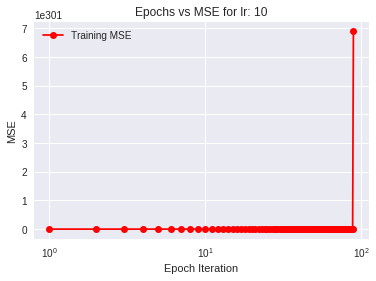

MSE after training:  nan


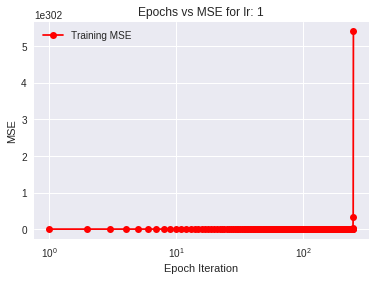

MSE after training:  23340.485934199172


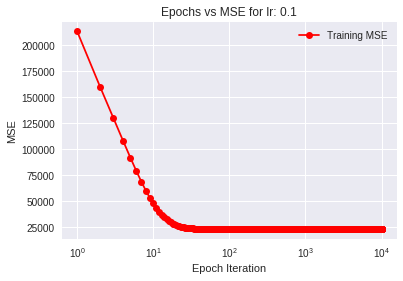

MSE after training:  23340.485934199172


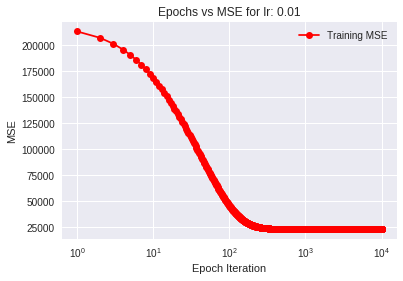

MSE after training:  23350.191053575858


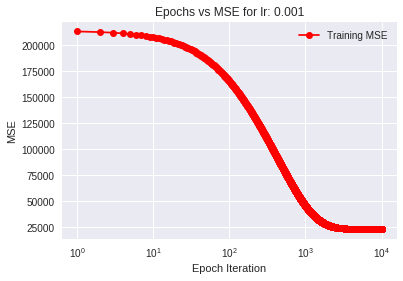

In [0]:
learn_list = [10, 1, 0.1, 0.01, 0.001]
for learn in learn_list:
    linear_regression(X,Y,learning_rate=learn, epochs=10000,plot_learning_curve=True)

For the best-performing model, plot the graph of predicted prices vs actual prices (scatter plot).

MSE after training:  23340.485934199172


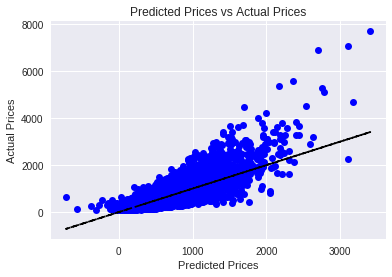

In [0]:
#selected the best performing model with minimum MSE learing rates = 0.1 and 0.01
predicted_lr1 = linear_regression(X,Y,learning_rate=0.01, epochs=10000,return_predictions=True)
#Plot predicted prices vs actual prices
plt.title("Predicted Prices vs Actual Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.plot(predicted_lr1, Y, 'bo', predicted_lr1, predicted_lr1, '--k')
plt.show()

Plot the predictions of the best-obtained model as a function of the sqft_living. 

Now, train a linear regressor (LR2) that predicts the house price only based on sqft_living. 
In the same plot as above, plot the graph of LR2 predictions vs sqft_living.

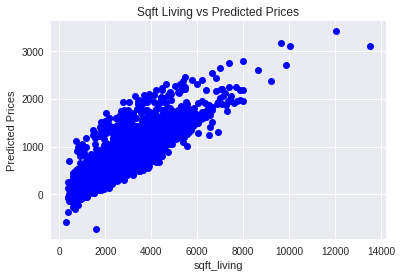

MSE after training:  34175.64341651991


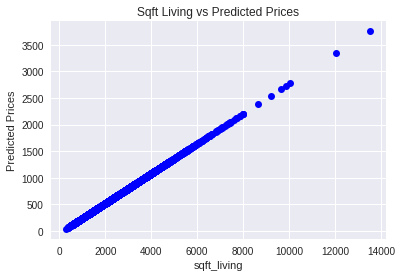

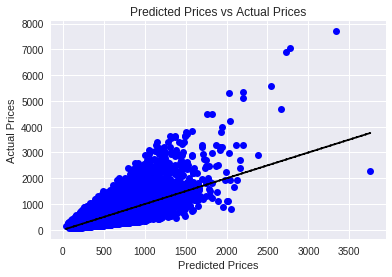

In [0]:
plt.title("Sqft Living vs Predicted Prices")
plt.xlabel("sqft_living")
plt.ylabel("Predicted Prices")
plt.plot(X[:,2], predicted_lr1, 'bo')
plt.show()
predicted_lr2 = linear_regression(X[:,2].reshape(X.shape[0],1),Y,learning_rate=0.01, epochs=10000,return_predictions=True)
plt.title("Sqft Living vs Predicted Prices")
plt.xlabel("sqft_living")
plt.ylabel("Predicted Prices")
plt.plot(X[:,2], predicted_lr2, 'bo')
plt.show()
#Below code is implemented for observation purpose.
plt.title("Predicted Prices vs Actual Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.plot(predicted_lr2, Y, 'bo', predicted_lr2, predicted_lr2, '--k')
plt.show()

### 2.4 Observations [8 pts]

In this part, list the various conclusions you made from the experiments above. <br>
For example: 
- What did you learn by observing the various plots above? 
- How well did Linear Regression perform?
- Can you think of a way to improve the performance?
- etc.

In [0]:
'''
Learning Curve Plots:
We can see that in case if learning rate is higher the parameters overshoots and do not converge and global minimum.
Also we can see that as we converge to local minimum the partial derivative also decreases which inturn takes smaller steps. This can be noticed in learning curve
with alpha 0.1. For learning curve with learning rate 0.1,0.01 and 0.001 after cetain epochs it can be seen that mean square error does not decreases.
Best model is selected based on minimum MSE.

Predicted vs Actual Price Plot:
It can be seen that the model doesn't preform well for all the prediction as the points are scattered and there is some difference among the actual price and 
predicted price in some cases. Specially for actually price>=4000 doesn't give good predicted price

Predicted value using all features vs sqft living:
The Predicted values wrt  sqft living there is a possiblity of a linear line that satisfy most of the point.

Predicted value using sqft_living vs sqft_living:
This shows a linear behiviour between the feature and prediction. But the Mean Square error is higher in comparision when trained with all the features.
If we plot the graph of predicted values by lr2 model and the actual prices the prediction aren't good as done by lr1 model.We can see alot of points are away from
the line.

Improving the performance of the model:
-Plot the heat map and find the relation of features that have impact on the price(target).
-Use only the key features set that influence price for predicting the prices.
-Apply regularization to prevent overfitting.
-Adding weight decay helps to converge the cost fuction more it reduce cost fuction from 25k(without weight decay) to 9k(with weight decay). (Tested)
-Analysis of how the outliers affect the linear line. Is it wise to remove the outliers or not?
'''

"\nLearning Curve Plots:\nWe can see that in case if learning rate is higher the parameters overshoots and do not converge and global minimum.\nAlso we can see that as we converge to local minimum the partial derivative also decreases which inturn takes smaller steps. This can be noticed in learning curve\nwith alpha 0.1. For learning curve with learning rate 0.1,0.01 and 0.001 after cetain epochs it can be seen that mean square error does not decreases.\nBest model is selected based on minimum MSE.\n\nPredicted vs Actual Price Plot:\nIt can be seen that the model doesn't preform well for all the prediction as the points are scattered and there is some difference among the actual price and \npredicted price in some cases. Specially for actually price>=4000 doesn't give good predicted price\n\nPredicted value using all features vs sqft living:\nThe Predicted values wrt  sqft living there is a possiblity of a linear line that satisfy most of the point.\n\nPredicted value using sqft_livin